In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def load_nlu_results_dataframe(language: str) -> pd.DataFrame:
    df = (
        pd
        .read_csv(f'https://scandeval.com/{language}-nlu.csv')
        .query('merge == "not-merged-model"')
        .set_index('model_id')
    )
    df['generative'] = df.index.map(lambda x: "few-shot" in x)
    df.index = df.index.map(lambda x: re.sub('\(.*\)', '', x).strip())
    columns_to_keep = [col for col in df.columns if "rank" in col] + ["generative"]
    df = df[columns_to_keep]
    return df

In [3]:
def load_nlg_results_dataframe(language: str) -> pd.DataFrame:
    df = (
        pd
        .read_csv(f'https://scandeval.com/{language}-nlg.csv')
        .query('merge == "not-merged-model"')
        .set_index('model_id')
    )
    df.index = df.index.map(lambda x: re.sub('\(.*\)', '', x).strip())
    columns_to_keep = [col for col in df.columns if "rank" in col]
    df = df[columns_to_keep]
    return df

In [4]:
language_mapping = {
    'no': ('mainland-scandinavian', 'no_rank', 'Norwegian'),
    'sv': ('mainland-scandinavian', 'sv_rank', 'Swedish'),
    'da': ('mainland-scandinavian', 'da_rank', 'Danish'),
    'is': ('insular-scandinavian', 'is_rank', 'Icelandic'),
    'fo': ('insular-scandinavian', 'fo_rank', 'Faroese'),
    'nl': ('dutch', 'rank', 'Dutch'),
    'de': ('german', 'rank', 'German'),
    'en': ('english', 'rank', 'English'),
}

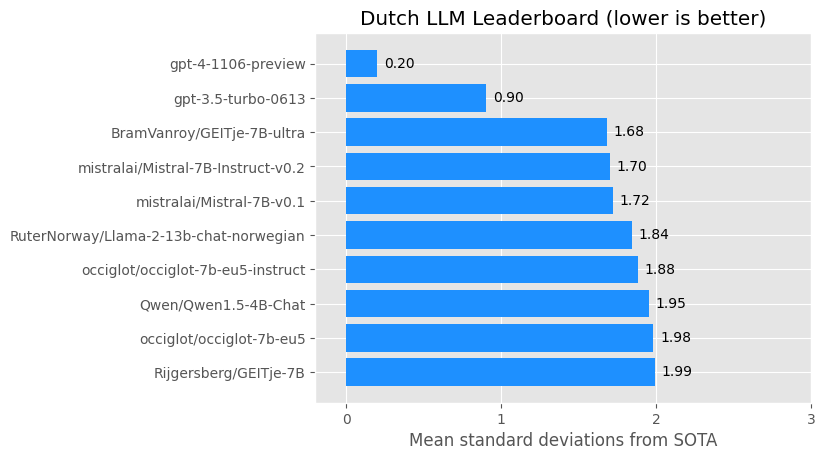

In [21]:
LANGUAGE = 'nl'
TOP_N = 10
MAX_VAL = 3

leaderboard, score_column, title = language_mapping[LANGUAGE]
df = load_nlg_results_dataframe(language=leaderboard)
top_df = df.sort_values(by=score_column).head(TOP_N)[::-1] - 1
plot = plt.barh(y=top_df.index, width=top_df[score_column], color='dodgerblue')
plt.title(f'{title} LLM Leaderboard (lower is better)')
plt.xticks(range(0, MAX_VAL + 1))
plt.xlim(-0.2, MAX_VAL)
plt.xlabel('Mean standard deviations from SOTA')
plt.bar_label(plot, padding=5, fmt="{:.2f}")
plt.savefig(f'/Users/dan/Downloads/{LANGUAGE}-llm-leaderboard.png', dpi=200, bbox_inches = "tight")
plt.show()